In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress, pearsonr
import statsmodels.api as sm

In [2]:
ln = pd.read_excel("linear-equation-example-google-sheets.xlsx")

In [3]:
ln.head()

,Number of Employees,Average Number of Tickets
0,51,5
1,68,5
2,77,9
3,124,10
4,124,15


Calculate teh slope and intercept point

In [14]:
Y = ln['Average Number of Tickets']
X = ln['Number of Employees']
slope = ((X*Y).mean() - X.mean()*Y.mean()) / ((X**2).mean() - (X.mean())**2)
slope

0.18331691230172817

In [15]:
ymean = ln['Average Number of Tickets'].mean()
xmean = ln['Number of Employees'].mean()
Intercept = ymean - slope* xmean
Intercept

-11.05483069327132

In [9]:
x = ln['Number of Employees']
y = ln['Average Number of Tickets']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
slope, intercept, r_value, p_value, std_err

(0.18331691230172809,
 -11.054830693271299,
 0.9871090323176199,
 8.910573574507151e-16,
 0.007005752069008885)

In [10]:
x = ln['Number of Employees']
y = ln['Average Number of Tickets']
slope_intercept = np.polyfit(x,y,1)
slope_intercept

array([  0.18331691, -11.05483069])

Calculate correlation

In [25]:
corr, _ = pearsonr(y, x)
corr

0.9871090323176197

In [27]:
r_value**2

0.9743842416830281

In [29]:
model = sm.OLS(y, sm.add_constant(x))
results = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     Average Number of Tickets   R-squared:                       0.974
Model:                                   OLS   Adj. R-squared:                  0.973
Method:                        Least Squares   F-statistic:                     684.7
Date:                       Fri, 17 Jun 2022   Prob (F-statistic):           8.91e-16
Time:                               00:39:57   Log-Likelihood:                -57.381
No. Observations:                         20   AIC:                             118.8
Df Residuals:                             18   BIC:                             120.8
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -11.0548      2.105     -5.251      0.000     -15.478      -6.632
Number of Employees     0.1833      0.007     26.167      0.000       0.169       0.198
==============================================================================
Omnibus:                        1.098   Durbin-Watson:                   0.695
Prob(Omnibus):                  0.577   Jarque-Bera (JB):                0.979
Skew:                          -0.360   Prob(JB):                        0.613
Kurtosis:                       2.190   Cond. No.                         630.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Graphic

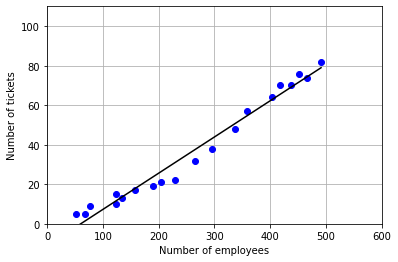

In [47]:
poly1d_fn1 = np.poly1d(slope_intercept)
poly1d_fn2 = np.poly1d([slope, intercept])
poly1d_fn3 = np.poly1d([slope, Intercept])
plt.plot(x,y, 'bo', x, poly1d_fn1(x), '-k') #'--k'=black dashed line, 'yo' = yellow circle marker
plt.xlim(0, 600)
plt.ylim(0, 110)
plt.xlabel('Number of employees')
plt.ylabel('Number of tickets')
plt.grid()

Conclusion
I wanna know how many employees do I need to sell aprox. 100 tickets.

In [55]:
for x in range(0,1000, 100):
  y = slope*x + intercept
  print(x,"-->", y)

0 --> -11.054830693271299
100 --> 7.276860536901516
200 --> 25.60855176707433
300 --> 43.940242997247154
400 --> 62.27193422741996
500 --> 80.60362545759278
600 --> 98.9353166877656
700 --> 117.26700791793843
800 --> 135.59869914811122
900 --> 153.93039037828405
